# 1) Introducing the DataSet. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Dataset 1: Standford Open Policing Project**

In [81]:
ri = pd.read_csv(r'C:\Users\causa\Desktop\Data Science\Data Sets\Rode Island - Policing\police.csv',low_memory = False)
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [8]:
ri.shape

(91741, 15)

In [9]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [10]:
ri.isna().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# Removing the column that only contains missing values.

In [82]:
ri.drop(['county_name'],axis=1,inplace=True)

In [14]:
ri[~ri.search_type.isna()].shape

(3196, 14)

In [15]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [ ]:
# We could have used the method ri.dropna(subset=['county_name'], inplace=True) both methods are correct.

# Do men or women speed more often?

In [25]:
ri[speeding]['driver_gender'].value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

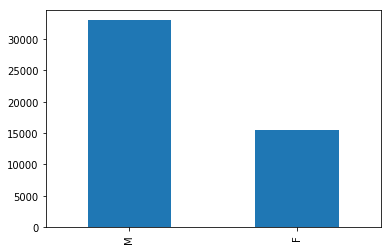

In [22]:
speeding = ri['violation'] == 'Speeding'
ri[speeding]['driver_gender'].value_counts().plot(kind='bar')

In [44]:
mal = ri['driver_gender'] == 'M'
femal = ri['driver_gender'] == 'F'
male = ri[mal].violation.value_counts()
female=ri[femal].violation.value_counts()
comparison = pd.concat([male,female],axis=1,keys=['Male_infraction','Female_infraction'])
comparison

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Male_infraction,Female_infraction
Equipment,8533,2487
Moving violation,13020,3204
Other,3627,690
Registration/plates,2419,1013
Seat belt,2317,635
Speeding,32979,15482


In [54]:
ri.groupby(['violation','driver_gender']).violation.count().unstack().rename(columns={'F':'Female_infraction','M':'Male_infraction'})

driver_gender,Female_infraction,Male_infraction
violation,,
Equipment,2487,8533
Moving violation,3204,13020
Other,690,3627
Registration/plates,1013,2419
Seat belt,635,2317
Speeding,15482,32979


In [63]:
ri.groupby('violation').driver_gender.value_counts().unstack().rename(columns={'F':'Female_infraction','M':'Male_infraction'})

driver_gender,Female_infraction,Male_infraction
violation,,
Equipment,2487,8533
Moving violation,3204,13020
Other,690,3627
Registration/plates,1013,2419
Seat belt,635,2317
Speeding,15482,32979


In [57]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [64]:
pd.DataFrame(ri.driver_race.value_counts())

,driver_race
White,62158
Black,12244
Hispanic,9507
Asian,2259
Other,240


**What are the relationships?**<br>
# In particular, does gender affect who gets searched during a stop?
# driver_gender, search_conducted

In [3]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [7]:
ri.groupby('search_conducted')['driver_gender'].value_counts().unstack().rename(columns = {'F':'Female','M':'Male'})

driver_gender,Female,Male
search_conducted,,
False,23040,60170
True,471,2725


In [13]:
ri.search_conducted.value_counts(normalize=True)
#This is the baseline search rate. A search in your vehicle during a traffic stop. 

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

**From the previous report, we can say, in Rode Island, within this dataset, out of every 100 people who were stopped, 3.5% of them had their veichle searched.**  <br>
**So, 3.5% of the stops results in a search**

In [19]:
ri.search_conducted.mean()
# The mean gives you the percent of 1's (or Trues in the boolean Series). Notice that this result matches with the previous
# percent of True.

0.03483720473942948

**Why the previous .mean() gives us the percent of Trues? Recall this, a boolean Series is represented by 0's and 1's.
this mean, that when we take the mean of Trues, 1's, we just add all the 1's and then we divide by the total of cases (N, either True or False), that's why when we compute the mean of a boolean series we get the percent of Trues, or 1's**

In [16]:
ri.groupby('driver_gender')['search_conducted'].mean()
# This gives us the percent of Trues for each gender. 

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

**Notice that the search_conducted percent for females is 2% and the search_condcuted for males is 4%. Therefore, this results
prove that the gender is a factor to be searched in a stop?**<br>
**We cannot conclude anything from those numbers, we don't know the reasons for the search on each case, the percents are very similar. There's no relation between the gender and the search conducted.**

In [20]:
ri.groupby(['violation','driver_gender'])['search_conducted'].mean()
# from this table, we can say that the males are serached in a high rate for any violation. 
# but Does this prove causation? well, no.

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

**If we want to prove causation, we can proceed as follows:**
- Talk to some experts
- Get different type of Data.
- Design experiements.
- Do come up with more hypotesis and test them with the data you have.
- Include relevant factors when you are studying a relationship. 

# Handling missing values. 
**Why search_type is missing so often?**

In [48]:
pd.set_option('precision',2)

In [49]:
total = ri.isna().sum()
percent = total/len(ri)*100
missing_percents = pd.concat([total,percent],axis=1, keys = ['total','percent'])
missing_percents

,total,percent
stop_date,0,0.00
stop_time,0,0.00
driver_gender,5335,5.82
driver_age_raw,5327,5.81
driver_age,5621,6.13
driver_race,5333,5.81
violation_raw,5333,5.81
violation,5333,5.81
search_conducted,0,0.00
search_type,88545,96.52


In [54]:
ri.isna().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [51]:
ri.search_conducted.value_counts()
# We can see that the search conducted has the same amount of Falses than the NaN of search type.
# this is, when the search type is missing, the search conducted is False.

False    88545
True      3196
Name: search_conducted, dtype: int64

In [59]:
ri[ri.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [60]:
ri[ri.search_conducted == False]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
5,2005-03-23,09:45,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,2005-06-06,13:20,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,2005-07-13,10:15,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,2005-07-13,15:45,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# During a search, how often is the driver frisked?

In [61]:
ri.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Inventory,Protective Frisk                                     11
Protective

In [70]:
ri['Frisk'] = ri.search_type.str.contains('Protective Frisk')

In [73]:
ri.Frisk.value_counts(dropna=False)
# one thing, the NaN comes from the missing values of the column search_type. Recall that there was 88545 missing values.

NaN      88545
False     2922
True       274
Name: Frisk, dtype: int64

In [74]:
ri.Frisk.sum()

274

In [75]:
ri.Frisk.mean()
# We get the percent of the True values.
# 8.5% of the time, when there's a search, there's a frisk. 

0.08573216520650813

# Which year has the least number of stops?

In [76]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [85]:
pd.to_datetime(ri['stop_date']).year.value_counts()

AttributeError: 'Series' object has no attribute 'year'

In [84]:
ri.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [89]:
combined = ri.stop_date +' '+ri.stop_time
combined.head()

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
3    2005-02-20 17:15
4    2005-03-14 10:00
dtype: object

In [91]:
ri['stop_datetime'] = pd.to_datetime(combined)
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00:00


In [92]:
ri.stop_datetime.dt.year.value_counts().sort_values(ascending=False)

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64